<a href="https://colab.research.google.com/github/dinggga/super-broccoli/blob/main/220620hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념정리]**

## **Part04 합성곱 신경망(CNN)**

### **4.1 합성곱 신경망**
: 데이터가 가진 특징들의 패턴을 학습하는 알고리즘. 
- 이미지분류
- 객체 탐지: 이미지에서 특정한 객체 인식하고 위치를 파악하여 경계 박스로 표시해 줌.
  - 경계 박스: 회귀분석으로 해결
- 스타일 전이: 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술

**1-1 이미지 표현**
- 픽셀마다 0~255 사이의 화소값 (0은 검은색 > 회색 > 255는 흰색)
- 컬러 이미지: R(빨강), G(초록), B(파랑) 채널의 3장 이미지를 겹쳐서 표현

**1-2 합성곱(Convolution)**
- 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성(특성맵) 추출
- 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영 > 겹치는 부분에 대하여 합성곱 연산 수행
- element-wise 곱셈 연산 수행 후 모두 더한 값으로 단일 스칼라값: feature map의 좌측 상단의 첫번째 값
- 오차 역전파 시 커널의 가중치 업데이트. 공유 가중치 덕에 완전 연결층 사용할 때보다 효율적

**1-3 채널(channel)**
- 입력 이미지를 구성하는 2차원 배열의 개수
- 특성맵의 생성 과정: 입력 이미지의 채널 개수만큼 커널 생성 > 각 채널마다 하나씩 커널 적용하여 합성곱 연산 수행 > 입력이미지의 채널 개수만큼 합성곱 연산 결과 생성 > element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵 생성
- 생성되는 커널 개수 계산 가능






**1-4 스트라이드(stride)**
- 커널이 연산을 수행하며 이동하는 간격. 주로 1 또는 2로 설정
- 1로 설정 시보다 2로 설정 시 특성맵의 크기가 반으로 줄어듦.
- 텐서플로 케라스의 Conv2D 레이어의 strides 매개변수에 스트라이드 지정 가능

**1-5 패딩(padding)**
- 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩 설정 가능
- zero-padding: 입력 이미지의 가장자리에 0으로 채워진 패딩 값으로 채운 후 추출
- 텐서플로 케라스의 Conv2D 레이어에서 padding='same'으로 설정하면 zero-padding 적용. 디폴트는 padding='valid'

**1-6. 특성맵(feature map) 사이즈**


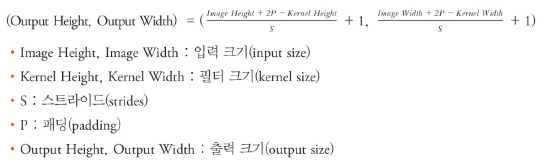

**1-7 풀링(pooling) 레이어**
- 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소
- 이미지 축소를 통해 연산량 감소 + 과대적합 방지
- 최대 풀링(max pooling): 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념. 성능 좋음.
- 평균 풀링(average pooling)
- 최대풀링 커널 크기=2x2 + 스트라이드=2 => 크기 1/4로 줄어듦.

### **4.2 간단한 모델 생성**
**2-1 데이터 로드 및 전처리**

**2-2 Sequential API로 모델 생성 및 학습**
- 합성곱 레이어 1개, 풀링 레이어 1개 적용하는 모델 생성
- 최종분류기로 Dense 레이어 적용 위해 Flatten층 추가하여 1차원 배열로 펼쳐줌
- 합성곱은 Conv2D 레이어 사용, (3,3) 크기의 32종류 커널 적용, ReLU 활성화 함수 적용
- 풀링 레이어: (2,2) 크기로 최대 풀링 적용
- 최종 분류기 노드 개수 10, softmax 적용

**2-3 모델 구조 파악**
- 모델 인스턴스에 summary() 메소드 적용하면 모델 구조 요약 (각 레이어 이름 / 출력 텐서 형태 / 각 레이어를 구성하는 파라미터(가중치) 개수)
- input 속성으로 입력 레이어의 텐서 추출 / output 속성으로 출력 텐서 추출
- layers 속성으로 모델 구성하는 레이어 추출(파이썬 리스트 형태)
- weights 속성으로 각 레이어의 가중치 행렬 추출 (첫번째 변수: 커널 행렬의 가중치 / 두번째 변수: 각 커널의 상수항)

### **4.3 복잡한 모델 생성**

**3-1 데이터셋 준비**
- 홀수/짝수 판단하는 정답(y_odd) 새로 추가 (홀수1 짝수0)

**3-2 Functional API로 다중입력, 다중출력 레이어 생성**
- 입력 레이어: Conv2D 레이어, Flatten 레이어
- 최종적으로 Concatenate 레이어에서 합쳐진 다음 Dense 레이어 통과
- 케라스 utils 모듈의 plot_model 함수로 모델 구조 그리기 가능

**3-3 다중 출력 분류 모델**
- 서로 다른 두 가지 분류 문제에 맞는 최종 분류기의 출력 레이어 2개 만들기

**3-4 전이학습(Transfer Learning)**
- 기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념
- 모델 인스턴스의 trainable 속성을 False로 지정하면 파라미터값이 고정되어 업데이트되지 않음.

---
---
# **[필사]**

**4.2.1 데이터 로드 및 전처리**

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


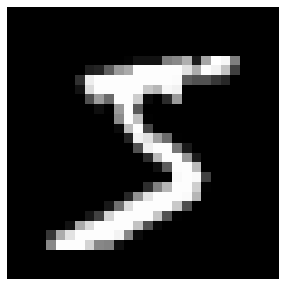

In [3]:
# 샘플 이미지(인덱스 0) 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [4]:
# 이미지 픽셀 최소/최대값 출력
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 0~1 사이로 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
# 채널 추가 (tf.newaxis 축을 텐서 배열에 직접 추가)
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


**2-2 Sequential API로 모델 생성 및 학습**



In [7]:
model = tf.keras.Sequential([
                             #Convolution 적용(32 filters)
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), name='conv'),
                             #Max Pooling 적용
                             tf.keras.layers.MaxPooling2D((2,2), name='pool'),
                             #Classifier 출력층
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10, activation='softmax'),
])

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2077 - accuracy: 0.9414 - val_loss: 0.0913 - val_accuracy: 0.9715
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0754 - accuracy: 0.9783 - val_loss: 0.0638 - val_accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0588 - accuracy: 0.9827 - val_loss: 0.0555 - val_accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0486 - accuracy: 0.9856 - val_loss: 0.0581 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0410 - accuracy: 0.9881 - val_loss: 0.0599 - val_accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0622 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0600 -

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.0592 - accuracy: 0.9837


[0.059175025671720505, 0.9836999773979187]

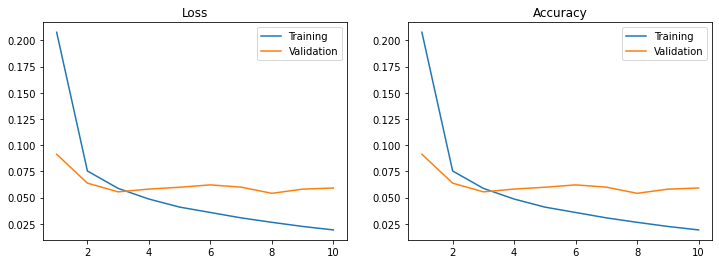

In [10]:
# 10 epoch동안 모델의 예측 오차와 정확도를 그래프로 시각화
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1,2, figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

**2-3 모델 구조 파악**

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [13]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [14]:
# 레이어
model.layers

In [15]:
# 첫번째 레이어 선택
model.layers[0]

In [16]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [18]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-3.44647579e-02, -1.06031604e-01, -7.08915353e-01,
           -2.97919009e-02, -4.31188434e-01, -1.41636385e-02,
           -6.97133124e-01,  1.89517751e-01, -3.90303656e-02,
           -6.90250218e-01,  2.16868147e-01, -4.34230894e-01,
           -9.68356669e-01, -1.10971296e+00,  4.58454378e-02,
            2.99191505e-01,  1.83728889e-01,  1.88448802e-01,
            4.58094716e-01,  5.80511093e-01,  2.63032854e-01,
           -1.68392345e-01,  3.13189358e-01,  6.66893125e-02,
            2.11677045e-01, -3.28888595e-01,  3.10610920e-01,
            2.08730012e-01, -1.39714491e+00,  4.17650819e-01,
            3.61558974e-01, -6.73878729e-01]],
 
         [[-5.32036781e-01,  5.58385670e-01, -1.50476232e-01,
           -3.17829490e-01,  4.02088352e-02,  3.39246988e-01,
           -6.26560867e-01,  4.88054864e-02,  4.47149992e-01,
           -2.43697106e-03,  1.65631726e-01, -5.15147150e-01,
           

In [19]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-3.44647579e-02, -1.06031604e-01, -7.08915353e-01,
          -2.97919009e-02, -4.31188434e-01, -1.41636385e-02,
          -6.97133124e-01,  1.89517751e-01, -3.90303656e-02,
          -6.90250218e-01,  2.16868147e-01, -4.34230894e-01,
          -9.68356669e-01, -1.10971296e+00,  4.58454378e-02,
           2.99191505e-01,  1.83728889e-01,  1.88448802e-01,
           4.58094716e-01,  5.80511093e-01,  2.63032854e-01,
          -1.68392345e-01,  3.13189358e-01,  6.66893125e-02,
           2.11677045e-01, -3.28888595e-01,  3.10610920e-01,
           2.08730012e-01, -1.39714491e+00,  4.17650819e-01,
           3.61558974e-01, -6.73878729e-01]],

        [[-5.32036781e-01,  5.58385670e-01, -1.50476232e-01,
          -3.17829490e-01,  4.02088352e-02,  3.39246988e-01,
          -6.26560867e-01,  4.88054864e-02,  4.47149992e-01,
          -2.43697106e-03,  1.65631726e-01, -5.15147150e-01,
          -1.08207512e+00,  

In [20]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.11833884, -0.02428015, -0.28413662, -0.00061659, -0.25332654,
       -0.13856788, -0.022509  , -0.16699533, -0.01849246, -0.14775981,
       -0.2262879 , -0.01560458, -0.01024024, -0.05846649, -0.02765904,
       -0.33734518, -0.20552315, -0.37717992, -0.01210447,  0.04490282,
       -0.26690614, -0.30548057, -0.3219026 , -0.19982418, -0.23490049,
       -0.20293982, -0.13659403, -0.2649297 ,  0.16249457, -0.32414693,
       -0.22310726, -0.05574466], dtype=float32)>

In [21]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [23]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (1, 2번째 레이어)
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])
len(activations)

2

In [24]:
# 첫번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

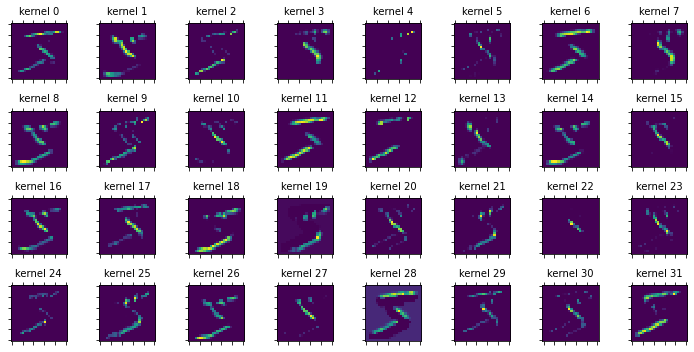

In [25]:
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [26]:
# 두번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


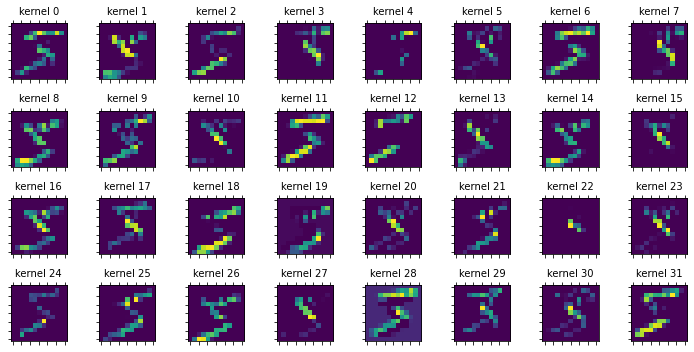

In [27]:
# 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

**4.3 복잡한 모델 생성**

**4.3.1 데이터셋 준비**

In [28]:
import numpy as np

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [29]:
# 새로운 출력값 y_odd 배열 생성
y_train_odd = []
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [30]:
# 값 비교
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [31]:
# validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [32]:
# 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


**3-2 Functional API로 다중입력, 다중출력 레이어 생성**

In [33]:
inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

In [34]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

# 에러 해결 방법 모르겠음 ㅠㅠ

ImportError: ignored

In [35]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2146 - accuracy: 0.9389 - val_loss: 0.0968 - val_accuracy: 0.9718
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0806 - accuracy: 0.9766 - val_loss: 0.0736 - val_accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0615 - accuracy: 0.9820 - val_loss: 0.0768 - val_accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0579 - val_accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0424 - accuracy: 0.9871 - val_loss: 0.0576 - val_accuracy: 0.9825
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0599 - val_accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0572 -

**3-3 다중출력분류모델**

In [36]:
inputs = tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [37]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


In [38]:
# 모델구조 그림
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

# wrappers Error 해결 방법 못 찾음...

ImportError: ignored

In [39]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              #loss=1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in}, {'digit_dense':y_train, 'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd
                    }), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3690 - digit_dense_loss: 0.2059 - odd_dense_loss: 0.3261 - digit_dense_accuracy: 0.9412 - odd_dense_accuracy: 0.8625 - val_loss: 0.2220 - val_digit_dense_loss: 0.0841 - val_odd_dense_loss: 0.2757 - val_digit_dense_accuracy: 0.9745 - val_odd_dense_accuracy: 0.8884
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2132 - digit_dense_loss: 0.0775 - odd_dense_loss: 0.2714 - digit_dense_accuracy: 0.9775 - odd_dense_accuracy: 0.8908 - val_loss: 0.1963 - val_digit_dense_loss: 0.0642 - val_odd_dense_loss: 0.2643 - val_digit_dense_accuracy: 0.9792 - val_odd_dense_accuracy: 0.8975
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1893 - digit_dense_loss: 0.0579 - odd_dense_loss: 0.2627 - digit_dense_accuracy: 0.9828 - odd_dense_accuracy: 0.8949 - val_loss: 0.2009 - val_digit_dense_loss: 0.0706 - val_odd_dense_loss: 0.2606 - val_digit_dense_accuracy: 0.9755 -

In [40]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 2s 6ms/step - loss: 0.1902 - digit_dense_loss: 0.0620 - odd_dense_loss: 0.2563 - digit_dense_accuracy: 0.9831 - odd_dense_accuracy: 0.9007


[0.19015540182590485,
 0.062009550631046295,
 0.25629180669784546,
 0.9830999970436096,
 0.9006999731063843]

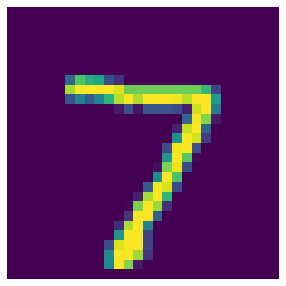

In [41]:
# 샘플 이미지(인덱스 0) 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [42]:
# 예측 확률
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[4.79811677e-12 1.58358309e-11 3.88577259e-09 7.29745508e-08
 1.07092165e-11 3.31307898e-11 1.42989688e-20 9.99999881e-01
 2.71523781e-09 2.35308528e-09]
[0.9995092]


In [43]:
# 예측 확률을 실제 숫자 맞추기 정답 레이블로 변환
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [44]:
# 홀짝 여부에 대한 예측 레이블 출력. 임계값 0.5로 지정
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]
odd_labels[0:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

**3-4 전이 학습**

In [45]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 모델 구조 시각화
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

ImportError: ignored

In [47]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [48]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

ImportError: ignored

In [49]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1283 - accuracy: 0.9641 - val_loss: 0.0627 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0569 - accuracy: 0.9830 - val_loss: 0.0541 - val_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0432 - accuracy: 0.9869 - val_loss: 0.0644 - val_accuracy: 0.9789
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0532 - val_accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0526 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0517 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0539 -

In [50]:
# 베이스 모델의 가중치 고정
base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [51]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [53]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 0.0512 - val_accuracy: 0.9857
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0540 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0586 - val_accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.0541 - val_accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0600 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.0567 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0603 - val_accu

In [54]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [55]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [56]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1144 - accuracy: 0.9693 - val_loss: 0.0553 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0489 - accuracy: 0.9857 - val_loss: 0.0494 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0513 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0482 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0219 - accuracy: 0.9936 - val_loss: 0.0522 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.0533 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0556 - val_accuracy